In [1]:
%reload_kedro

2023-03-24 16:53:37,723 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/guilhermepalazzo/Desktop/dev/git_repositories/crypto_msc_thesis
2023-03-24 16:53:38,820 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-03-24 16:53:39,114 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-03-24 16:53:39,117 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import matplotlib.pyplot as plt
import warnings

In [3]:
plt.style.use("grayscale")
warnings.filterwarnings("ignore")

### EDA: top 5 feature importances (only MIC)

In [4]:
df_fte_imps = catalog.load("all_fte_multic_mic_binance")

2023-03-24 16:53:39,878 - kedro.io.data_catalog - INFO - Loading data from `all_fte_multic_mic_binance` (ParquetDataSet)...


In [5]:
df_fte_imps = df_fte_imps.sort_values(by="score", ascending=False).head()

In [6]:
df_fte_imps.loc[:, "features"] = df_fte_imps["features"].str.replace("log_return_mean", "logret_avg") \
                                                        .str.replace("log_return_accum", "logret_acc")

<Figure size 800x400 with 0 Axes>

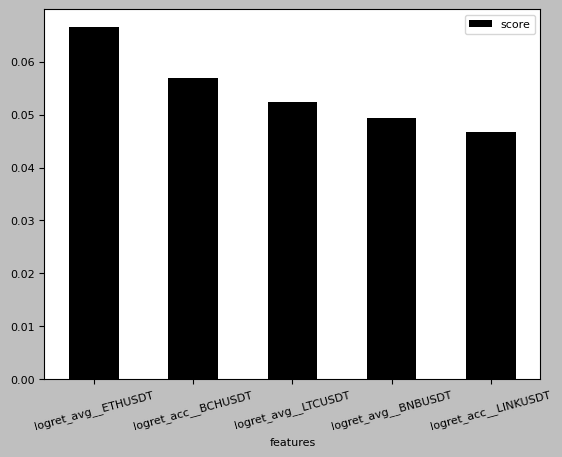

In [7]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 8})

plot = df_fte_imps.set_index("features").sort_values(by="score", ascending=False).plot(kind="bar")
plt.xticks(rotation = 15)

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_top5_fte_imps_only_mic.png")

### EDA: top 5 feature importances (VIF and MIC)

In [8]:
df_fte_imps = catalog.load("all_fte_nonmultic_mic_binance")

2023-03-24 16:53:41,160 - kedro.io.data_catalog - INFO - Loading data from `all_fte_nonmultic_mic_binance` (ParquetDataSet)...


In [9]:
df_fte_imps = df_fte_imps.sort_values(by="score", ascending=False).head()

In [10]:
df_fte_imps.loc[:, "features"] = df_fte_imps["features"].str.replace("log_return_mean", "logret_avg") \
                                                        .str.replace("log_return_accum", "logret_acc")

<Figure size 800x400 with 0 Axes>

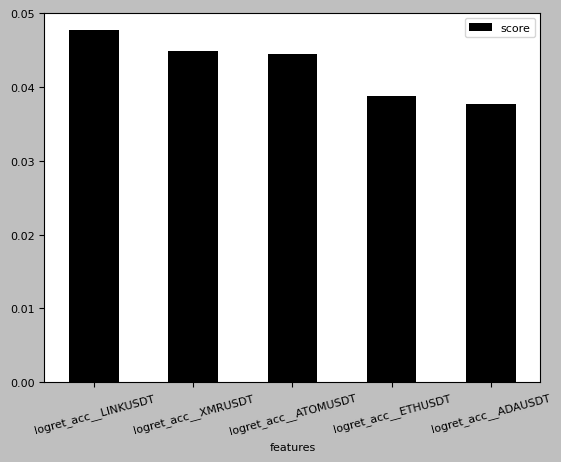

In [11]:
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 8})

plot = df_fte_imps.set_index("features").sort_values(by="score", ascending=False).plot(kind="bar")
plt.xticks(rotation = 15)

fig = plot.get_figure()
fig.savefig("/Users/guilhermepalazzo/Desktop/fig_top5_fte_imps_vif_mic.png")